# 1. Loading & cleaning the datasets

In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
os.listdir("Data")

['adultliteracy.csv',
 'badteeth.csv',
 'gdp.csv',
 'healthexpend.csv',
 'population.csv',
 'sugar_consumption.csv']

## 1.1. Adult Literacy Rate (%)

In [3]:
# Load adult literacy and set index
literacy_full = pd.read_csv("Data/adultliteracy.csv")
literacy_full.rename(columns={literacy_full.columns[0]:"Country"}, inplace=True)
literacy_full.set_index("Country", inplace=True)
literacy_full.head()

,X1975,X1976,X1977,X1978,X1979,X1980,X1981,X1982,X1983,X1984,...,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,18.157681,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,95.93864,NaN,NaN,96.845299
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.8735,NaN,NaN,NaN,72.648679,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.362420


In [4]:
# Using max instead of mean here is a better choice (why?)
literacy = literacy_full.max(axis=1)
print(sum(literacy.isna()), "countries with no data")
literacy.dropna(inplace=True)
literacy.name = "literacy"
literacy

106 countries with no data


Country
Afghanistan           39.000000
Albania               98.712978
Algeria               72.648679
Angola                70.362420
Anguilla              95.407098
                        ...    
West Bank and Gaza    95.267242
Vietnam               93.359470
Yemen, Rep.           65.261950
Zambia                69.149218
Zimbabwe              83.582714
Name: literacy, Length: 156, dtype: float64

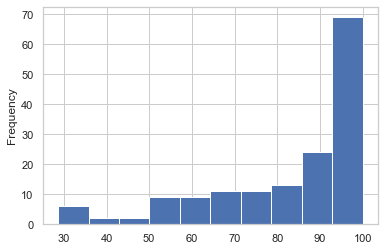

In [5]:
literacy.plot.hist()

# 1.2. Bad Teeth (# of bad teeth per child)

In [6]:
bad_teeth_full = pd.read_csv("Data/badteeth.csv")
bad_teeth_full.rename(columns={bad_teeth_full.columns[0]:"Country"}, inplace=True)
bad_teeth_full.set_index("Country", inplace=True)
bad_teeth = bad_teeth_full.X2004.dropna()
bad_teeth.name = "bad_teeth"
bad_teeth

Country
Afghanistan    2.90
Albania        3.02
Algeria        2.30
Angola         1.70
Anguilla       2.50
               ... 
Venezuela      2.10
Vietnam        1.90
Yemen, Rep.    3.10
Zambia         2.30
Zimbabwe       1.30
Name: bad_teeth, Length: 190, dtype: float64

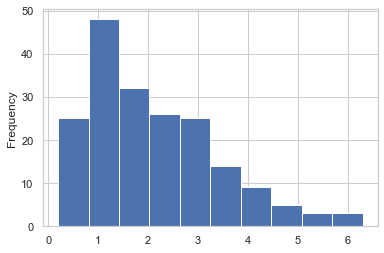

In [7]:
bad_teeth.plot.hist()

## 1.3. GDP

In [8]:
gdp_full = pd.read_csv("Data/gdp.csv")
gdp_full.rename(columns={gdp_full.columns[0]:"Country"}, inplace=True)
gdp_full.set_index("Country", inplace=True)
gdp = gdp_full.X2004.dropna()
gdp.name = "gdp"
gdp

Country
Albania                 1454.022854
Algeria                 2043.135713
Andorra                20254.346287
Angola                   353.231466
Antigua and Barbuda    10599.284668
                           ...     
West Bank and Gaza      1029.051966
Vietnam                  506.938950
Yemen                    559.999172
Zambia                   349.085472
Zimbabwe                 383.707665
Name: gdp, Length: 194, dtype: float64

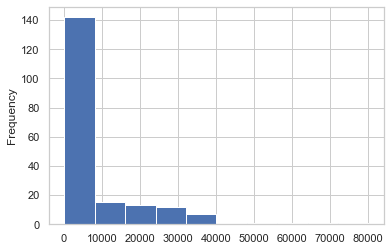

In [9]:
gdp.plot.hist()

## 1.4. Healthcare Spending (US$ per person)

In [10]:
health_spend_full = pd.read_csv("Data/healthexpend.csv")
health_spend_full.rename(columns={health_spend_full.columns[0]:"Country"}, inplace=True)
health_spend_full.set_index("Country", inplace=True)
health_spend = health_spend_full.X2004.dropna()
health_spend.name = "health_spend"
health_spend

Country
Afghanistan       1.614160
Albania          63.935601
Algeria          63.229395
Andorra        1517.211905
Angola           19.664783
                  ...     
Vanuatu          45.755352
Venezuela        99.022717
Vietnam           8.373131
Yemen            14.460323
Zambia           18.407207
Name: health_spend, Length: 190, dtype: float64

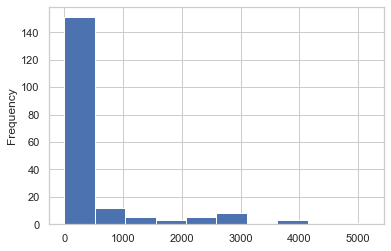

In [11]:
health_spend.plot.hist()

## 1.5. Sugar Consumption (g per day, per person)

In [12]:
sugar_full = pd.read_csv("Data/sugar_consumption.csv")
sugar_full.rename(columns={sugar_full.columns[0]:"Country"}, inplace=True)
sugar_full.set_index("Country", inplace=True)
sugar = sugar_full.X2004.dropna()
sugar.name = "sugar"
sugar

Country
Albania                 65.75
Algeria                 84.93
Angola                  35.62
Antigua and Barbuda     95.89
Argentina              112.33
                        ...  
West Bank and Gaza      90.41
Vietnam                 35.62
Yemen, Rep.             65.75
Zambia                  46.58
Zimbabwe               104.11
Name: sugar, Length: 175, dtype: float64

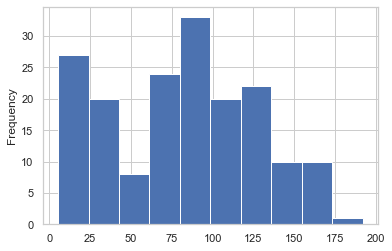

In [13]:
sugar.plot.hist()

# 2. Merging datasets & basic correlations

In [14]:
data = pd.merge(bad_teeth, sugar, left_index=True, right_index=True)\
    .merge(gdp, left_index=True, right_index=True)\
    .merge(literacy, left_index=True, right_index=True)\
    .merge(health_spend, left_index=True, right_index=True)
print(len(data), "countries remaining")
data.head()

119 countries remaining


,bad_teeth,sugar,gdp,literacy,health_spend
Country,,,,,
Albania,3.02,65.75,1454.022854,98.712978,63.935601
Algeria,2.30,84.93,2043.135713,72.648679,63.229395
Angola,1.70,35.62,353.231466,70.362420,19.664783
Antigua and Barbuda,0.70,95.89,10599.284668,98.950000,290.616312
Argentina,3.40,112.33,7492.249508,97.858770,173.801947


In [15]:
data.corr()

,bad_teeth,sugar,gdp,literacy,health_spend
bad_teeth,1.000000,0.366839,0.084987,0.372845,0.014250
sugar,0.366839,1.000000,0.394889,0.568284,0.320016
gdp,0.084987,0.394889,1.000000,0.362225,0.768014
literacy,0.372845,0.568284,0.362225,1.000000,0.356778
health_spend,0.014250,0.320016,0.768014,0.356778,1.000000


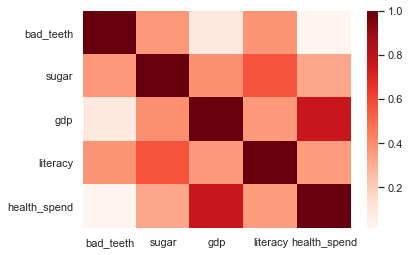

In [16]:
import seaborn as sns
sns.heatmap(data.corr(), cmap="Reds")

# 3. Linear Regression

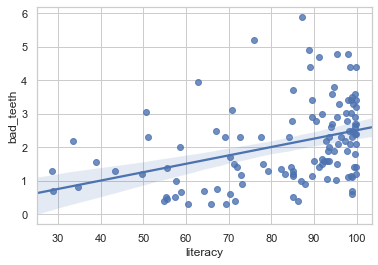

In [17]:
sns.regplot(x="literacy", y="bad_teeth", data=data)

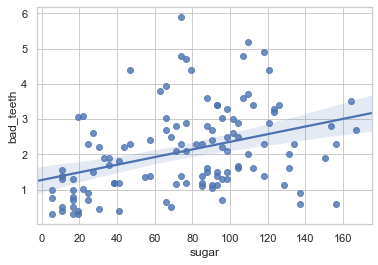

In [18]:
sns.regplot(x="sugar", y="bad_teeth", data=data)

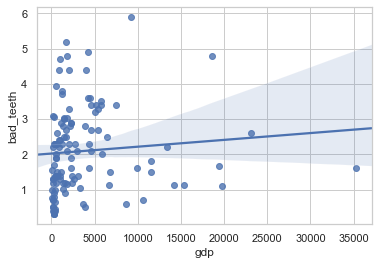

In [19]:
sns.regplot(x="gdp", y="bad_teeth", data=data)

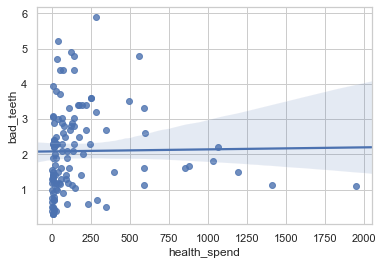

In [20]:
sns.regplot(x="health_spend", y="bad_teeth", data=data)

# 4. Predictive Modelling
## 4.1. Setting Up Evaluation

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
def get_features(data, target = "bad_teeth"):
    return [x for x in data.columns if x != target]
    
def evaluate(model, data, target = "bad_teeth"):
    features = get_features(data, target)
    results = []
    kf = KFold(5, shuffle=True) 
    for train_index, test_index in kf.split(data): 
        train = data.iloc[train_index]
        test = data.iloc[test_index]
        
        model.fit(train[features], train[target])
        predictions = model.predict(test[features])
        
        error = mean_squared_error(test[target], predictions)
        print("Fold score:", error)
        results.append(error)
    
    mean_score = np.mean(results)
    print("-------------------")
    print("AVG:", mean_score)
    return mean_score
        

## 4.2. Evaluating Your First Model

In [22]:
from sklearn.linear_model import LinearRegression
evaluate(LinearRegression(), data);

Fold score: 1.2666931056614592
Fold score: 1.3061031609626743
Fold score: 0.9732236247543472
Fold score: 1.1040711334857796
Fold score: 1.6614447191263555
-------------------
AVG: 1.2623071487981232


In [23]:
from sklearn.ensemble import RandomForestRegressor
evaluate(RandomForestRegressor(100), data);

Fold score: 1.6798514720833333
Fold score: 1.7201559912499995
Fold score: 1.3139636120833322
Fold score: 1.4419775295833333
Fold score: 0.9817523134782613
-------------------
AVG: 1.427540183695652


## 4.3. Measuring Feature Impact & Importance

In [24]:
def get_feature_weights(data):
    target = "bad_teeth"
    lr = LinearRegression()
    features = get_features(data)
    lr.fit(data[features], data[target])
    return dict(zip(features, lr.coef_))

In [25]:
get_feature_weights(data)

{'sugar': 0.007505667886811191,
 'gdp': 6.027750523175565e-06,
 'literacy': 0.019269338494403564,
 'health_spend': -0.00076063053178074}

In [26]:
def plot_feature_importances(data):
    target = "bad_teeth"
    rf = RandomForestRegressor(100)
    features = get_features(data)
    rf.fit(data[features], data[target])
    importances = pd.DataFrame(index=features, data=rf.feature_importances_, columns=["Feature Importance"])
    importances.plot.bar()

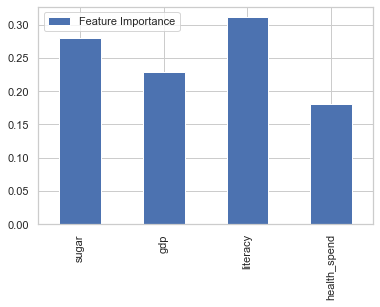

In [27]:
plot_feature_importances(data)

## 4.4. Add More Features!

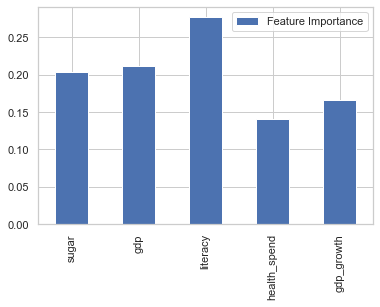

In [28]:
# one example here: total growth in gdp over the years
gdp_growth = (gdp_full.max(axis=1) - gdp_full.min(axis=1))/gdp_full.min(axis=1)
gdp_growth.name = "gdp_growth"
data_bis = pd.merge(data, gdp_growth, left_index=True, right_index=True)
plot_feature_importances(data_bis)

In [29]:
# what else can you think of?

# 5. Advanced Visualisation (extra)

In [30]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [31]:
population_full = pd.read_csv("Data/population.csv")
population_full.set_index("Country", inplace=True)
population_full.drop("Country_Code", axis=1, inplace=True)
population = population_full.iloc[:,-1]
population.name = "population"

In [32]:
points = []
for i, x in gdp_full.iterrows():
    if i not in bad_teeth.index or i not in population.index:
        continue
    bt = bad_teeth.loc[i]
    pop = population.loc[i]
    
    for column in x.index:
        year = int(column[1:])
        points.append((year, x[column], bt, np.sqrt(pop)))
df = pd.DataFrame(points, columns=["year", "gdp", "bad_teeth", "population (sqrt)"])

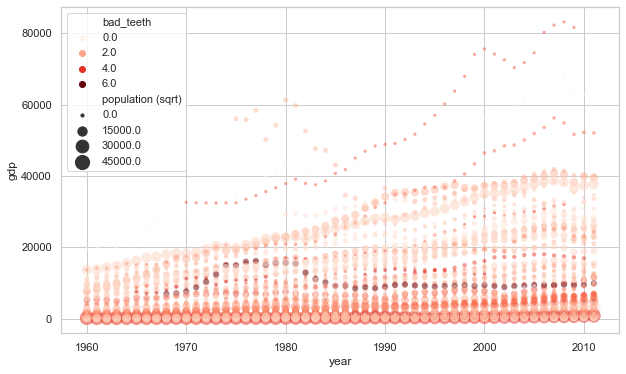

In [33]:
f, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df, 
                x="year", 
                y="gdp", 
                hue="bad_teeth", 
                size="population (sqrt)",
                palette="Reds", 
                sizes=(10, 200), 
                linewidth=0, 
                alpha=.5)